# Part III. Classification on MNIST Data

In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt


In [2]:
p3_train = pd.read_csv('./MNIST/train_resized.csv')
p3_test  = pd.read_csv('./MNIST/test_resized.csv')
P3_FEATURES = p3_train.shape[1] -1
p3_train.info()
p3_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 145 entries, label to pixel144
dtypes: float64(144), int64(1)
memory usage: 33.2 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144
0,2,0.0,0.0,0.072606,-0.360184,-6.625228,-3.997078,-5.531005,-1.731706,0.166274,...,0.000000,0.000000,0.000000,0.000075,0.015430,-0.189739,-0.185194,0.016683,0.000026,0.0
1,1,0.0,0.0,0.000000,0.001739,0.313278,-3.799580,-6.506716,0.240206,0.010433,...,0.000000,0.010356,-0.087299,-2.982227,-0.779243,0.061083,0.000609,0.000000,0.000000,0.0
2,1,0.0,0.0,0.000000,0.045693,-0.252522,-6.744340,-0.851903,0.112032,0.000000,...,0.000000,0.000000,0.168599,-1.623264,-4.564190,0.095272,0.009263,0.000000,0.000000,0.0
3,5,0.0,0.0,0.000000,0.091467,-0.728588,-6.229659,-1.798628,0.033384,-0.630858,...,0.011929,-0.137988,-0.420487,-0.096168,0.009753,0.000000,0.000000,0.000000,0.000000,0.0
4,3,0.0,0.0,0.000000,0.000862,0.170443,-1.632121,-9.145603,-5.091849,0.222623,...,-0.155082,-1.367886,-4.408230,-2.914262,0.112931,0.010156,0.000000,0.000000,0.000000,0.0


1.Use only the digit images of 3 and 6 from train_resized.csv and test_resized.csv to build an SVM classifier for binary classification. More specifically, use a linear kernel and choose the best cost (the data size is large so a large cost value is suitable) parameter (called budget in our course) by 5 fold cross validation. Apply your model on the test data and report the misclassification error, confusion matrix. Also report the time cost of training your model.

In [3]:
p3_train_3_or_6 = p3_train.query('label == 3 | label == 6')
p3_test_3_or_6 = p3_test.query('label == 3 | label == 6')

In [4]:
p3_train_3_or_6_x = p3_train_3_or_6.iloc[:, 1:].copy()
p3_train_3_or_6_y = p3_train_3_or_6['label'].copy()
p3_test_3_or_6_x = p3_test_3_or_6.iloc[:, 1:].copy()
p3_test_3_or_6_y = p3_test_3_or_6['label'].copy()

# SVM with linear kernel

In [5]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score

linear_svm_cvs = []
cost_range =  np.logspace(-8, 3, 12)
for i in cost_range:
    linear_svm = SVC(C = i, kernel='linear', random_state=42)
    linear_svm_cv_err = 1 - (np.mean(cross_val_score(linear_svm, 
                                                     p3_train_3_or_6_x, 
                                                     p3_train_3_or_6_y, 
                                                     n_jobs=4,
                                                     cv=5)
                                    ))
    linear_svm_cvs.append(linear_svm_cv_err)
    print(linear_svm, linear_svm_cv_err)

SVC(C=1e-08, kernel='linear', random_state=42) 0.01476903174308275
SVC(C=1e-07, kernel='linear', random_state=42) 0.009624766898563841
SVC(C=1e-06, kernel='linear', random_state=42) 0.0064720656743941785
SVC(C=1e-05, kernel='linear', random_state=42) 0.004978840238640814
SVC(C=0.0001, kernel='linear', random_state=42) 0.005310377572717351
SVC(C=0.001, kernel='linear', random_state=42) 0.007467641047872675
SVC(C=0.01, kernel='linear', random_state=42) 0.00796556635907597
SVC(C=0.1, kernel='linear', random_state=42) 0.00796556635907597
SVC(kernel='linear', random_state=42) 0.00796556635907597
SVC(C=10.0, kernel='linear', random_state=42) 0.00796556635907597
SVC(C=100.0, kernel='linear', random_state=42) 0.00796556635907597
SVC(C=1000.0, kernel='linear', random_state=42) 0.00796556635907597


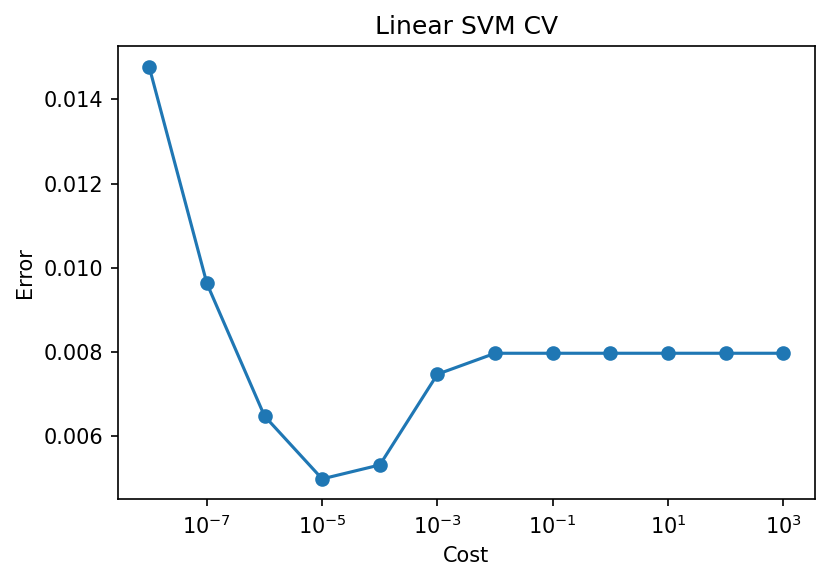

In [6]:
plt.figure(dpi = 150)
plt.title("Linear SVM CV")
plt.plot(cost_range, linear_svm_cvs)
plt.scatter(cost_range, linear_svm_cvs)
plt.xlabel('Cost')
plt.ylabel('Error')
plt.xscale('log')

Linear SVM is less sensitive to cost when it becomes large, and prediction results converged when cost increases. From the above plot, the best cost is 1e-5

In [7]:
print(f'The best misclassification error: {linear_svm_cvs[3]}')

The best misclassification error: 0.004978840238640814


Also report the time cost of training your model

In [8]:
linear_svm_start = time.time()
linear_svm = SVC(C = 1e-5, kernel='linear', random_state=42)
linear_svm.fit(p3_train_3_or_6_x, p3_train_3_or_6_y)

linear_svm_end= time.time()
print(f'Time cost of training: {linear_svm_end - linear_svm_start}s')

Time cost of training: 0.24634051322937012s


In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

p31_svm_test_hat = linear_svm.predict(p3_test_3_or_6_x)

print('confusion matrix')
print(confusion_matrix(p3_test_3_or_6_y ,p31_svm_test_hat))
print()

print('accuracy score')
print(accuracy_score(p3_test_3_or_6_y ,p31_svm_test_hat))
print()
p31_svm_acc = accuracy_score(p3_test_3_or_6_y ,p31_svm_test_hat)

print('precision score')
print(precision_score(p3_test_3_or_6_y ,p31_svm_test_hat, average='weighted'))
print()

print('recall score')
print(recall_score(p3_test_3_or_6_y ,p31_svm_test_hat, average='weighted'))
print()
print(f"Misclassification error: {1-p31_svm_acc}")

confusion matrix
[[1254    8]
 [   5 1195]]

accuracy score
0.9947197400487409

precision score
0.9947230040239867

recall score
0.9947197400487409

Misclassification error: 0.005280259951259136


2. Use only the digit images of 3 and 6 from train_resized.csv and test_resized.csv to build an SVM classifier for binary classification. More specifically, use a radial kernel and choose the best cost parameter, gamma parameter by 5 fold cross validation. Apply your model on the test data and report the misclassification error, confusion matrix. Also report the time cost of training your model.

# SVM with radial kernel

In [10]:
from collections import defaultdict 

radial_svm_cvs = defaultdict(lambda: defaultdict(float))
gammas = [0.001, 0.00001, 0.000001, 0.0000001]
cost_range = np.logspace(-4, 1, 6)
for gamma in gammas:
    for i in cost_range:
        radial_svm = SVC(C = i, kernel='rbf', gamma=gamma,random_state=42)  # radial basis function
        radial_svm_cv_err = 1 - (np.mean(cross_val_score(
                                radial_svm, p3_train_3_or_6_x, p3_train_3_or_6_y,
                                cv=5, n_jobs=4)))
        radial_svm_cvs[gamma][i] = radial_svm_cv_err
        print(radial_svm, radial_svm_cv_err)
        del radial_svm

SVC(C=0.0001, gamma=0.001, random_state=42) 0.4873879564831445
SVC(C=0.001, gamma=0.001, random_state=42) 0.4873879564831445
SVC(C=0.01, gamma=0.001, random_state=42) 0.4873879564831445
SVC(C=0.1, gamma=0.001, random_state=42) 0.4873879564831445
SVC(gamma=0.001, random_state=42) 0.4873879564831445
SVC(C=10.0, gamma=0.001, random_state=42) 0.4873879564831445
SVC(C=0.0001, gamma=1e-05, random_state=42) 0.4873879564831445
SVC(C=0.001, gamma=1e-05, random_state=42) 0.4873879564831445
SVC(C=0.01, gamma=1e-05, random_state=42) 0.12230397115391223
SVC(C=0.1, gamma=1e-05, random_state=42) 0.008463078796886903
SVC(gamma=1e-05, random_state=42) 0.0006637627904737542
SVC(C=10.0, gamma=1e-05, random_state=42) 0.0006637627904737542
SVC(C=0.0001, gamma=1e-06, random_state=42) 0.4873879564831445
SVC(C=0.001, gamma=1e-06, random_state=42) 0.4656485208810719
SVC(C=0.01, gamma=1e-06, random_state=42) 0.011781892749255007
SVC(C=0.1, gamma=1e-06, random_state=42) 0.005310790446109714
SVC(gamma=1e-06, rand

In [11]:
radial_cv_errs_df = pd.DataFrame(radial_svm_cvs)
radial_cv_errs_df

,1.000000e-03,1.000000e-05,1.000000e-06,1.000000e-07
0.0001,0.487388,0.487388,0.487388,0.487388
0.0010,0.487388,0.487388,0.465649,0.487388
0.0100,0.487388,0.122304,0.011782,0.026220
0.1000,0.487388,0.008463,0.005311,0.012777
1.0000,0.487388,0.000664,0.001660,0.008132
10.0000,0.487388,0.000664,0.001826,0.004149


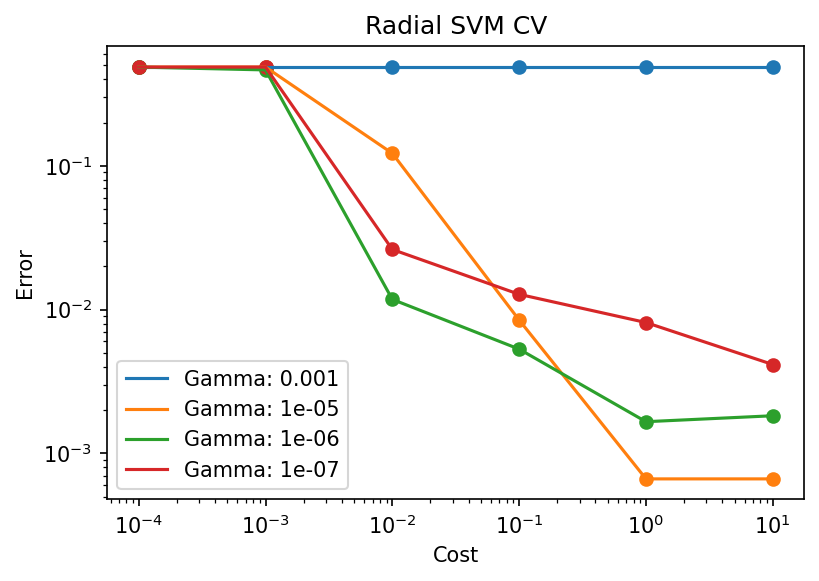

In [12]:
radial_cv_errs_df = pd.DataFrame(radial_svm_cvs)
plt.figure(dpi = 150)
plt.title("Radial SVM CV")
for col in radial_cv_errs_df.columns:
    plt.plot(cost_range, radial_cv_errs_df[col], label=f'Gamma: {col}')
    plt.scatter(cost_range, radial_cv_errs_df[col])
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cost')
plt.ylabel('Error')
plt.legend()
plt.show()

In [13]:
radial_svm_start = time.time()
radial_svm = SVC(C = 1, gamma=1e-5, kernel='rbf', random_state=42)
radial_svm.fit(p3_train_3_or_6_x, p3_train_3_or_6_y)
radial_svm_end = time.time()
print(f'time cost of training: {radial_svm_end - radial_svm_start}s')
radial_svm

time cost of training: 2.2951226234436035s


SVC(C=1, gamma=1e-05, random_state=42)

In [14]:
p32_svm_test_hat = radial_svm.predict(p3_test_3_or_6_x)

print('confusion matrix')
print(confusion_matrix(p3_test_3_or_6_y ,p32_svm_test_hat))
print()

print('accuracy score')
print(accuracy_score(p3_test_3_or_6_y ,p32_svm_test_hat))
print()
p32_svm_acc = accuracy_score(p3_test_3_or_6_y ,p32_svm_test_hat)

print('precision score')
print(precision_score(p3_test_3_or_6_y ,p32_svm_test_hat, average='weighted'))
print()

print('recall score')
print(recall_score(p3_test_3_or_6_y ,p32_svm_test_hat, average='weighted'))
print()
print(f"Misclassification error: {1-p32_svm_acc}")

confusion matrix
[[1262    0]
 [   3 1197]]

accuracy score
0.9987814784727863

precision score
0.9987843682471592

recall score
0.9987814784727863

Misclassification error: 0.0012185215272136896


3. Compare the results of the above two models and report your comments.

From the above results, we observe that the radial kernel has a lower missclassification error. However, the training time is also much longer compare to the Linear kernel.

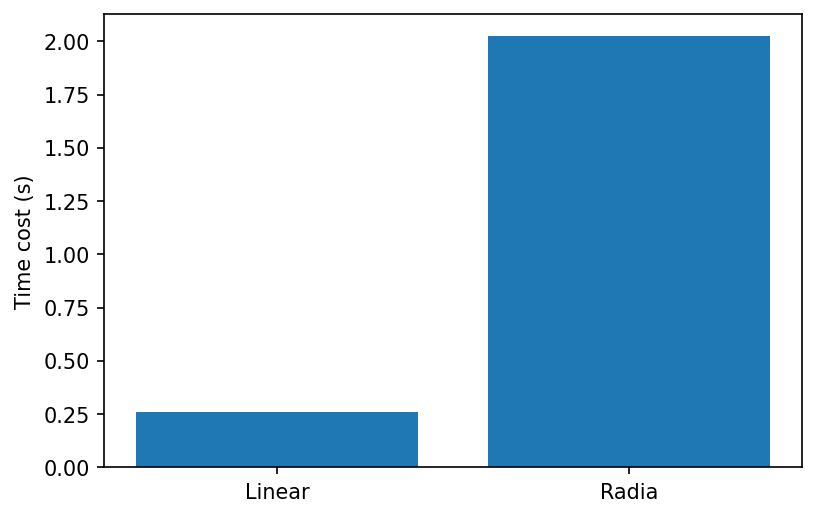

In [15]:
plt.figure(dpi = 150)
plt.bar(['Linear','Radia'],[0.26032423973083496, 2.025317907333374])
plt.ylabel('Time cost (s)')
plt.show()

4. Use only the digit images of 1,2,5 and 8 from train_resized.csv and test_resized.csv to build an SVM classifier for multi-class classification. More specifically, use a linear kernel and choose the best cost parameter (called budget in our course) by 5 fold cross validation. Apply your model on the test data and report the misclassification error, confusion matrix. Also report the time cost oftraining your model.

# SVM with linear kernel - 1,2,5,8

In [16]:
p3_train_4 = p3_train[p3_train.label.isin([1,2,5,8])]
p3_test_4 = p3_test[p3_test.label.isin([1,2,5,8])]

p3_train_4_x = p3_train_4.iloc[:, 1:].copy()
p3_train_4_y = p3_train_4['label'].copy()
p3_test_4_x = p3_test_4.iloc[:, 1:].copy()
p3_test_4_y = p3_test_4['label'].copy()

In [17]:
linear_svm_cvs_4 = []
cost_range = [0.1, 1, 5, 8, 10]
for i in cost_range:
    linear_svm = LinearSVC(C = i, dual=False, random_state=42)  # Prefer dual=False when n_samples > n_features.
    linear_svm_cv_err = 1 - (np.mean(
                            cross_val_score(linear_svm, 
                                            p3_train_4_x, 
                                            p3_train_4_y, 
                                            cv=5, n_jobs=4)
                            ))
    linear_svm_cvs_4.append(linear_svm_cv_err)
    print(linear_svm, linear_svm_cv_err)

LinearSVC(C=0.1, dual=False, random_state=42) 0.05212745754016779
LinearSVC(C=1, dual=False, random_state=42) 0.051959707598568494
LinearSVC(C=5, dual=False, random_state=42) 0.05195960189602178
LinearSVC(C=8, dual=False, random_state=42) 0.05204360018645926
LinearSVC(C=10, dual=False, random_state=42) 0.05229545412104275


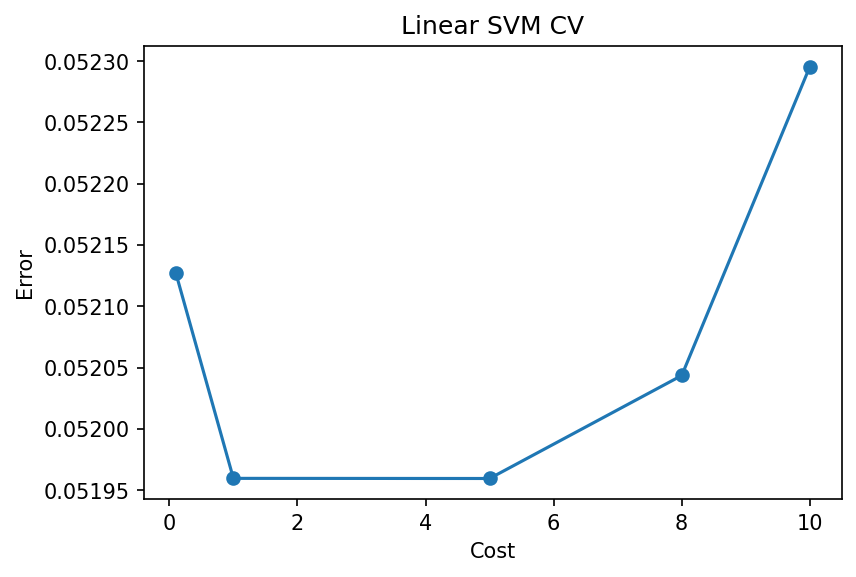

In [18]:
plt.figure(dpi = 150)
plt.title("Linear SVM CV")
plt.plot(cost_range, linear_svm_cvs_4)
plt.scatter(cost_range, linear_svm_cvs_4)
plt.xlabel('Cost')
plt.ylabel('Error')
plt.show()

The best cost is 2.

In [19]:
linear_svm_start = time.time()

p34_linear_svm = LinearSVC(C = 2, dual=False, random_state=42)
p34_linear_svm.fit(p3_train_4_x, p3_train_4_y)

linear_svm_end= time.time()
print(f'time cost of training: {linear_svm_end - linear_svm_start}s')
p34_linear_svm

time cost of training: 28.016762018203735s


LinearSVC(C=2, dual=False, random_state=42)

In [20]:
p34_svm_test_hat = p34_linear_svm.predict(p3_test_4_x)

print('confusion matrix')
print(confusion_matrix(p3_test_4_y ,p34_svm_test_hat))
print()

print('accuracy score')
print(accuracy_score(p3_test_4_y ,p34_svm_test_hat))
print()
p34_svm_acc = accuracy_score(p3_test_4_y ,p34_svm_test_hat)

print('precision score')
print(precision_score(p3_test_4_y ,p34_svm_test_hat, average='weighted'))
print()

print('recall score')
print(recall_score(p3_test_4_y ,p34_svm_test_hat, average='weighted'))
print()
print(f"Misclassification error: {1-p32_svm_acc}")

confusion matrix
[[1332   13    7   11]
 [   6 1121   24   34]
 [   9   15 1058   44]
 [  25   19   63 1025]]

accuracy score
0.9438202247191011

precision score
0.9438746945619171

recall score
0.9438202247191011

Misclassification error: 0.0012185215272136896


# SVM with linear kernel - all 10 classes

In [21]:
p3_train_10_x = p3_train.iloc[:, 1:].copy()
p3_train_10_y = p3_train['label'].copy()
p3_test_10_x = p3_test.iloc[:, 1:].copy()
p3_test_10_y = p3_test['label'].copy()

In [22]:
linear_svm_cvs_10 = []
cost_range = [0.1, 1, 3, 5]

for i in cost_range:
    s = time.time()
    linear_svm = LinearSVC(C = i, dual=False, random_state=42)  # Prefer dual=False when n_samples > n_features.
    linear_svm_cv_err = 1 - (np.mean(
                            cross_val_score(linear_svm, 
                                            p3_train_10_x, p3_train_10_y, cv=3, n_jobs=4)
                            ))
    linear_svm_cvs_10.append(linear_svm_cv_err)
    print(f"model: {linear_svm}, cv error: {linear_svm_cv_err}, cv time: {time.time() -s}")

model: LinearSVC(C=0.1, dual=False, random_state=42), cv error: 0.08816666666666662, cv time: 131.78195023536682
model: LinearSVC(C=1, dual=False, random_state=42), cv error: 0.08870000000000011, cv time: 143.2674720287323
model: LinearSVC(C=3, dual=False, random_state=42), cv error: 0.08866666666666667, cv time: 156.31597232818604
model: LinearSVC(C=5, dual=False, random_state=42), cv error: 0.08843333333333325, cv time: 145.67376828193665


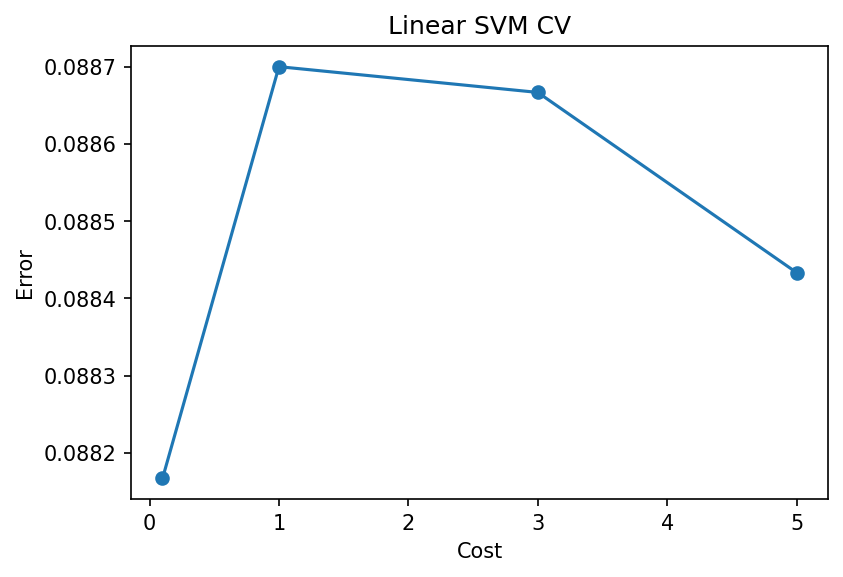

In [23]:
plt.figure(dpi = 150)
plt.title("Linear SVM CV")
plt.plot(cost_range, linear_svm_cvs_10)
plt.scatter(cost_range, linear_svm_cvs_10)
plt.xlabel('Cost')
plt.ylabel('Error')
plt.show()

In [24]:
linear_svm_start = time.time()

p35_linear_svm = LinearSVC(C = 5, dual=False, random_state=42)
p35_linear_svm.fit(p3_train_10_x, p3_train_10_y)

linear_svm_end= time.time()
print(f'time cost of training: {linear_svm_end - linear_svm_start}s')
p35_linear_svm

time cost of training: 99.74393582344055s


LinearSVC(C=5, dual=False, random_state=42)

In [25]:
p35_svm_test_hat = p35_linear_svm.predict(p3_test_10_x)

print('confusion matrix')
print(confusion_matrix(p3_test_10_y ,p35_svm_test_hat))
print()

print('accuracy score')
print(accuracy_score(p3_test_10_y ,p35_svm_test_hat))
print()
p35_svm_acc = accuracy_score(p3_test_10_y ,p35_svm_test_hat)

print('precision score')
print(precision_score(p3_test_10_y ,p35_svm_test_hat, average='weighted'))
print()

print('recall score')
print(recall_score(p3_test_10_y ,p35_svm_test_hat, average='weighted'))
print()
print(f"Misclassification error: {1 - p35_svm_acc}")

confusion matrix
[[1108    0    1    2    0    8   11    0    7    3]
 [   0 1333    8    5    0    4    1    1   10    1]
 [  11    6 1049   11   23   13   14   20   35    3]
 [   2   10   45 1109    3   34   10   15   16   18]
 [   3    6   11    1 1094    3    7    1    9   40]
 [  14    8    9   47   13  947   24    5   33   26]
 [   9    1   10    1    6   17 1149    0    7    0]
 [   0    5   16    2   14    6    0 1174    1   46]
 [   8   26   17   46    8   33    8    9  958   19]
 [  11    5    5   16   33   10    0   48   10 1015]]

accuracy score
0.9113333333333333

precision score
0.9108288924551629

recall score
0.9113333333333333

Misclassification error: 0.08866666666666667


# Part IV. Additional Bonus

For famous MNIST dataset, there are lots of reports that convolution neural network has almost perfect performance in classification. Due to time limit, the simulation won't be conducted.